In [ ]:
#@title access drive
from google.colab import drive
drive.mount('/content/gdrive')
path_folder_data_drive = '/content/gdrive/MyDrive/data-videos/uber/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#@title token mapbox TO COMPLETE

mapbox_token = 'TO_COMPLETE'

In [ ]:
# Install GDAL and Geopandas
!apt install gdal-bin python-gdal python3-gdal --quiet
!apt install python3-rtree --quiet
!pip install git+git://github.com/geopandas/geopandas.git --quiet
!pip install descartes --quiet
!pip install osmnx
!pip install plotly_express
!pip install currencyconverter

In [ ]:
!pip uninstall matplotlib --yes
!pip install matplotlib==3.1.3

Found existing installation: matplotlib 3.4.3
Uninstalling matplotlib-3.4.3:
  Successfully uninstalled matplotlib-3.4.3
  Using cached matplotlib-3.1.3-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
osmnx 1.1.1 requires matplotlib>=3.3, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, LineString

import matplotlib.pyplot as plt
import plotly_express as px

import networkx as nx
import osmnx as ox
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go


ox.config(use_cache=True, log_console=True)

## Acount and Profile

In [ ]:
#list all files
from os import listdir
from os.path import isfile, join
mypath = path_folder_data_drive+"Uber Data/Account and Profile"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
print(onlyfiles)

['rider_eater_saved_locations.csv', 'customer_support_contacts.csv', 'communications_sent.csv', 'profile_data.csv', 'payment_methods-0.csv']


In [ ]:
import os
import pandas as pd
profile_data_df = pd.read_csv(os.path.join(mypath, 'profile_data.csv'))
profile_data_df

In [ ]:
import plotly.express as px
px.set_mapbox_access_token(mapbox_token)
fig = px.scatter_mapbox(profile_data_df, lat="Signup Lat", lon="Signup Long", color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10)
fig.show()

In [ ]:
customer_support_contacts_df = pd.read_csv(os.path.join(mypath, 'customer_support_contacts.csv'))
customer_support_contacts_df.head()

In [ ]:
communications_sent_df = pd.read_csv(os.path.join(mypath, 'communications_sent.csv'))
communications_sent_df.head()

In [ ]:
communications_sent_df.Medium.value_counts()

intercom_text    97
push              9
Name: Medium, dtype: int64

In [ ]:
communications_sent_df.Content.tolist()

In [ ]:
communications_sent_df[communications_sent_df.Content=='29f3ced0-07c0-4d1b-903f-ac6354b2d4c9']

In [ ]:
payment_methods_df = pd.read_csv(os.path.join(mypath, 'payment_methods-0.csv'))
payment_methods_df.head()

## Eats

In [ ]:
eats_app_analytics_df = pd.read_csv(os.path.join(mypath, path_folder_data_drive+'Uber Data/Eats/eats_app_analytics-0.csv'))
eats_app_analytics_df.head()

In [ ]:
import plotly.express as px
px.set_mapbox_access_token(mapbox_token)
fig = px.scatter_mapbox(eats_app_analytics_df, lat="Latitude", lon="Longitude",color="Analytics Event Type", color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10)
fig.show()

In [ ]:
eats_order_details_df = pd.read_csv(os.path.join(mypath, '/content/gdrive/MyDrive/data-videos/uber/Uber Data/Eats/eats_order_details.csv'))
list_date = eats_order_details_df['Order Time'].tolist()
list_date = [datetime.strptime(date_, '%Y-%m-%d %H:%M:%S %z %Z') for date_ in list_date ]
eats_order_details_df['Order Time']= list_date
eats_order_details_df.head()

In [ ]:
eats_order_details_df.tail(10)

In [ ]:
print(f"Le plus souvent commandé : {eats_order_details_df['Item Name'].value_counts().index.tolist()[0]} a été commandé {eats_order_details_df['Item Name'].value_counts().tolist()[0]} fois")


Le plus souvent commandé : O’Tacos - Taille XL a été commandé 9 fois


In [ ]:
eats_order_details_df['Currency'].value_counts()

EUR    100
USD     18
Name: Currency, dtype: int64

In [ ]:
from currency_converter import CurrencyConverter
c = CurrencyConverter()

def convert(row):
    row['order_price_euro'] = c.convert(row['Order Price'], row['Currency'], 'EUR')
    return row

eats_order_details_df['order_price_euro'] = ''
eats_order_details_df['Order Price'].fillna(0,inplace=True)
eats_order_details_df['Currency'].fillna('EUR',inplace=True)

eats_order_details_df = eats_order_details_df.apply(convert,axis=1)

In [ ]:
eats_order_details_df['order_price_euro'].sum()

2925.07705882353

In [ ]:
eats_order_details_df.head()

In [ ]:
eats_order_details_df.drop_duplicates(subset='Order ID').order_price_euro.sum()

1192.518946648427

In [ ]:
eats_order_details_df.drop_duplicates(subset='Order ID').order_price_euro.mean()

21.682162666335042

(array([14., 10., 14.,  6.,  6.,  3.,  1.,  0.,  0.,  1.]),
 array([ 9.26812585, 14.24031327, 19.21250068, 24.1846881 , 29.15687551,
        34.12906293, 39.10125034, 44.07343776, 49.04562517, 54.01781259,
        58.99      ]),
 <a list of 10 Patch objects>)

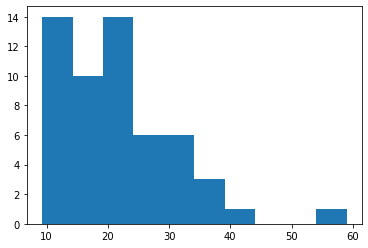

In [ ]:
plt.hist(eats_order_details_df.drop_duplicates(subset='Order ID').order_price_euro)

In [ ]:
cum_sum_eats = eats_order_details_df.drop_duplicates(subset='Order ID').set_index('Order Time')
cum_sum_eats = cum_sum_eats.groupby(pd.Grouper(freq="M")).sum()
#cum_sum = cum_sum.groupby('Order Time').order_price_euro.sum()
#cum_sum = cum_sum.groupby(cum_sum.index.month).cumsum().reset_index()
cum_sum_eats['cum_sum'] = cum_sum_eats['order_price_euro'].cumsum()
fig = px.line(cum_sum_eats, x=cum_sum_eats.index, y='cum_sum')
fig.show()

In [ ]:
cum_sum_eats

Special Instructions  ...      cum_sum
Order Time                                       ...             
2018-08-31 00:00:00+00:00                   0.0  ...    53.300000
2018-09-30 00:00:00+00:00                   0.0  ...    53.300000
2018-10-31 00:00:00+00:00                   0.0  ...    53.300000
2018-11-30 00:00:00+00:00                   0.0  ...    53.300000
2018-12-31 00:00:00+00:00                   0.0  ...    76.200000
2019-01-31 00:00:00+00:00                   0.0  ...    98.100000
2019-02-28 00:00:00+00:00                   0.0  ...    98.100000
2019-03-31 00:00:00+00:00                   0.0  ...    98.100000
2019-04-30 00:00:00+00:00                   0.0  ...    98.100000
2019-05-31 00:00:00+00:00                   0.0  ...    98.100000
2019-06-30 00:00:00+00:00                   0.0  ...    98.100000
2019-07-31 00:00:00+00:00                   0.0  ...    98.100000
2019-08-31 00:00:00+00:00                   0.0  ...    98.100000
2019-09-30 00:00:00+00:00                   0.0  ...   134.600000
2019-10-31 00:00:00+00:00                   0.0  ...   134.600000
2019-11-30 00:00:00+00:00                   0.0  ...   134.600000
2019-12-31 00:00:00+00:00                   0.0  ...   152.000000
2020-01-31 00:00:00+00:00                   0.0  ...   165.000000
2020-02-29 00:00:00+00:00                   0.0  ...   165.000000
2020-03-31 00:00:00+00:00                   0.0  ...   165.000000
2020-04-30 00:00:00+00:00                   0.0  ...   165.000000
2020-05-31 00:00:00+00:00                   0.0  ...   176.690000
2020-06-30 00:00:00+00:00                   0.0  ...   176.690000
2020-07-31 00:00:00+00:00                   0.0  ...   176.690000
2020-08-31 00:00:00+00:00                   0.0  ...   176.690000
2020-09-30 00:00:00+00:00                   0.0  ...   192.040000
2020-10-31 00:00:00+00:00                   0.0  ...   218.720000
2020-11-30 00:00:00+00:00                   0.0  ...   241.330000
2020-12-31 00:00:00+00:00                   0.0  ...   241.330000
2021-01-31 00:00:00+00:00                   0.0  ...   262.230000
2021-02-28 00:00:00+00:00                   0.0  ...   319.791149
2021-03-31 00:00:00+00:00                   0.0  ...   430.243092
2021-04-30 00:00:00+00:00                   0.0  ...   554.188947
2021-05-31 00:00:00+00:00                   0.0  ...   602.078947
2021-06-30 00:00:00+00:00                   0.0  ...   769.378947
2021-07-31 00:00:00+00:00                   0.0  ...   903.518947
2021-08-31 00:00:00+00:00                   0.0  ...  1018.948947
2021-09-30 00:00:00+00:00                   0.0  ...  1192.518947

[38 rows x 5 columns]

## JUMP

In [ ]:
jump_trips_df = pd.read_csv(os.path.join(mypath, '/content/gdrive/MyDrive/data-videos/uber/Uber Data/JUMP/jump-trips.csv'))
jump_trips_df.head()

## Rider

In [ ]:
trips_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490 entries, 0 to 589
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   City                  490 non-null    int64              
 1   Product Type          490 non-null    object             
 2   Trip or Order Status  490 non-null    object             
 3   Request Time          490 non-null    object             
 4   Begin Trip Time       490 non-null    datetime64[ns, UTC]
 5   Begin Trip Lat        490 non-null    float64            
 6   Begin Trip Lng        490 non-null    float64            
 7   Begin Trip Address    490 non-null    object             
 8   Dropoff Time          490 non-null    datetime64[ns, UTC]
 9   Dropoff Lat           490 non-null    float64            
 10  Dropoff Lng           490 non-null    float64            
 11  Dropoff Address       490 non-null    object             
 12  Distance

In [ ]:
trips_data_df = pd.read_csv(os.path.join(mypath, '/content/gdrive/MyDrive/data-videos/uber/Uber Data/Rider/trips_data.csv'))
trips_data_df = trips_data_df[trips_data_df['Trip or Order Status']=='COMPLETED']

list_date = trips_data_df['Begin Trip Time'].tolist()
list_date = [ datetime.strptime(date_, '%Y-%m-%d %H:%M:%S %z %Z') for date_ in list_date ]
trips_data_df['Begin Trip Time'] = list_date

list_date = trips_data_df['Dropoff Time'].tolist()
list_date = [ datetime.strptime(date_, '%Y-%m-%d %H:%M:%S %z %Z') for date_ in list_date ]
trips_data_df['Dropoff Time'] = list_date

trips_data_df.head()

In [ ]:
trips_data_df.tail()

In [ ]:
trips_data_df['Fare Currency'].value_counts()

In [ ]:
from currency_converter import CurrencyConverter
c = CurrencyConverter()

def convert(row):
    row['fare_amount_euro'] = c.convert(row['Fare Amount'], row['Fare Currency'], 'EUR')
    return row

trips_data_df['fare_amount_euro'] = ''
trips_data_df['Fare Amount'].fillna(0,inplace=True)
trips_data_df['Fare Currency'].fillna('EUR',inplace=True)

trips_data_df = trips_data_df.apply(convert,axis=1)

In [ ]:
trips_data_df['Product Type'].value_counts()

POOL: MATCHED            184
POOL                     102
UberX                     63
UberEATS Marketplace      55
uberX                     36
Pool: MATCHED             29
Pool                       7
uberXL                     4
uberPOOL                   2
Green                      2
uberPOOL: MATCHED          2
Express Pool: MATCHED      2
uberPOOL UFP               1
uberPOOL UFP: MATCHED      1
Name: Product Type, dtype: int64

In [ ]:
cum_sum_rides = trips_data_df[trips_data_df['Product Type']!='UberEATS Marketplace'].set_index('Begin Trip Time')
cum_sum_rides = cum_sum_rides.groupby(pd.Grouper(freq="M")).sum()
#cum_sum = cum_sum.groupby('Order Time').order_price_euro.sum()
#cum_sum = cum_sum.groupby(cum_sum.index.month).cumsum().reset_index()
cum_sum_rides['cum_sum'] = cum_sum_rides['fare_amount_euro'].cumsum()


cum_sum_rides['cum_sum_rides']=cum_sum_rides['cum_sum']
cum_sum_eats['cum_sum_eats']=cum_sum_eats['cum_sum']

combinate = pd.concat([cum_sum_rides['cum_sum_rides'], cum_sum_eats['cum_sum_eats']], axis=1)
combinate.fillna(0, inplace=True)
combinate

combinate['total_cum_sum'] =  combinate['cum_sum_rides']+combinate['cum_sum_eats']

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=combinate.index, y=combinate['cum_sum_eats'],mode='lines',name='eats'))
fig.add_trace(go.Scatter(x=combinate.index, y=combinate['cum_sum_rides'],mode='lines',name='rides'))
fig.add_trace(go.Scatter(x=combinate.index, y=combinate['total_cum_sum'],mode='lines',name='total'))

fig.show()

In [ ]:
px.set_mapbox_access_token(mapbox_token)
fig = px.scatter_mapbox(trips_data_df, lat="Begin Trip Lat", lon="Begin Trip Lng",color="Distance (miles)",
                        size='fare_amount_euro', color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10)
fig.show()

In [ ]:
trips_data_df['duration'] = trips_data_df['Dropoff Time']-trips_data_df['Begin Trip Time']

duration_list = []
for date in trips_data_df['duration'].tolist():
    duration_list.append(date.total_seconds()/60)

trips_data_df['duration'] = duration_list 
trips_data_df['duration'] 

0      18.433333
1       0.000000
2      14.716667
3      10.350000
4      24.766667
         ...    
585    16.900000
586    22.616667
587    24.066667
588    27.633333
589    16.083333
Name: duration, Length: 490, dtype: float64

(array([243., 128.,  71.,  25.,   9.,   8.,   3.,   1.,   1.,   1.]),
 array([ 0.        ,  8.06333333, 16.12666667, 24.19      , 32.25333333,
        40.31666667, 48.38      , 56.44333333, 64.50666667, 72.57      ,
        80.63333333]),
 <a list of 10 Patch objects>)

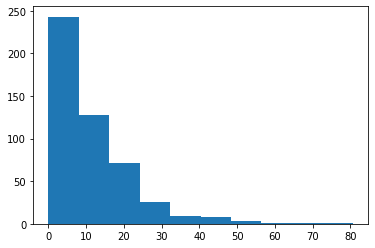

In [ ]:
plt.hist(trips_data_df['duration'])

In [ ]:
fig = px.scatter(trips_data_df, x="Distance (miles)", y="fare_amount_euro", color="Product Type",
                 size='duration', hover_data=['City'])
fig.show()

In [ ]:
trips_data_df['Begin Trip Time'] = pd.to_datetime(trips_data_df['Begin Trip Time'], format='%Y-%m-%d %H:%M:%S %z %Z')

In [ ]:
trips_data_df['begin_trip_hour'] = trips_data_df['Begin Trip Time'].dt.hour
trips_data_df['begin_weekday'] = trips_data_df['Begin Trip Time'].dt.weekday

In [ ]:
trip_uberx_paris =trips_data_df[(trips_data_df['Product Type'].isin(['UberX','uberX'])) & (trips_data_df['City']==3)]
trip_uberx_paris = trip_uberx_paris[['begin_trip_hour','begin_weekday',"Distance (miles)","fare_amount_euro"]] #'duration'
trip_uberx_paris.head()

begin_trip_hour  begin_weekday  Distance (miles)  fare_amount_euro
25                4              2             10.29             26.06
26               15              1              2.20             10.66
28               13              6              3.62             13.13
34               14              5              9.57             23.63
35               21              4              4.71             13.83

In [ ]:
fig = px.scatter(trip_uberx_paris, x="Distance (miles)", y="fare_amount_euro", color="begin_weekday",
                 size='begin_trip_hour')
fig.show()

In [ ]:
fig = px.scatter(trip_uberx_paris, x="Distance (miles)", y="fare_amount_euro", trendline="ols")
fig.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(trip_uberx_paris.drop('fare_amount_euro',axis=1), 
                                                    trip_uberx_paris['fare_amount_euro'], test_size=0.30, 
                                                    random_state=101)

In [ ]:
len(X_train)

(array([4., 2., 8., 3., 3., 4., 2., 2., 1., 2.]),
 array([ 7.63 , 10.151, 12.672, 15.193, 17.714, 20.235, 22.756, 25.277,
        27.798, 30.319, 32.84 ]),
 <a list of 10 Patch objects>)

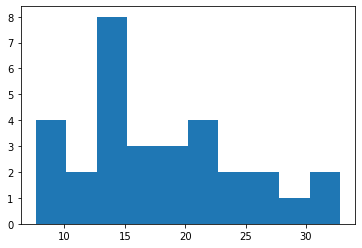

In [ ]:
plt.hist(y_train)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg .fit(X_train,y_train)
y_pred = reg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

2.400199874621357

In [ ]:
X_test.head()

begin_trip_hour  begin_weekday  Distance (miles)
26                15              1              2.20
589                0              4              5.52
156               18              2              5.12
82                19              2              5.53
572               13              1              1.27

In [ ]:
to_pred = pd.DataFrame(columns=['begin_trip_hour','begin_weekday','Distance (miles)'])
values = ['2','6','10']
to_pred.loc[0] = values
pred = reg.predict(to_pred)
print(f'Le prix pour un UberX pour un trajet de {values[2]}miles, à {values[0]}h le {int(values[1])+1}ème jour de la semaine est de : {pred[0].round(1)}€')

Le prix pour un UberX pour un trajet de 10miles, à 2h le 7ème jour de la semaine est de : 26.8€


In [ ]:
print('weights: ')
print(reg.coef_)
print('Intercept: ')
print(reg.intercept_)

weights: 
[-0.02259077 -0.29138894  1.97834004]
Intercept: 
8.823066377875977


In [ ]:
trip_uberx_paris = trip_uberx_paris[["Distance (miles)","fare_amount_euro"]] #'duration'
X_train, X_test, y_train, y_test = train_test_split(trip_uberx_paris.drop('fare_amount_euro',axis=1), 
                                                    trip_uberx_paris['fare_amount_euro'], test_size=0.01, 
                                                    random_state=101)
reg = LinearRegression()
reg .fit(X_train,y_train)
print('weights: ')
print(reg.coef_)
print('Intercept: ')
print(reg.intercept_)

weights: 
[2.07568436]
Intercept: 
6.370689992779946


\begin{align}
-0.023x-0.291x^2+1.98x^3+8.82=0 \\
2.07x+6.37=0
\end{align}

6.162075627237486
2.713043317894647
5.558014184397163


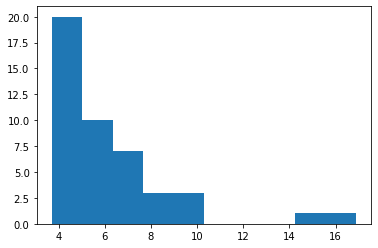

In [ ]:
trip_uberx_paris['euro_by_km'] = trip_uberx_paris['fare_amount_euro']/trip_uberx_paris['Distance (miles)']*1.6
plt.hist(trip_uberx_paris['euro_by_km'])

print(trip_uberx_paris['euro_by_km'].mean())
print(trip_uberx_paris['euro_by_km'].std())
print(trip_uberx_paris['euro_by_km'].median())
#consommation moyenne en France 6L/100km source :https://www.vroomly.com/blog/consommation-voiture-la-connaitre-et-la-reduire/#:~:text=En%20France%2C%20la%20consommation%20moyenne,de%206%20L%2F100%20km.
#prix moyen de l'essence : 1,50E https://www.autonews.fr/dossier/prix-de-l-essence-l-evolution-des-prix-en-2021-93257
#9E pour 100km (1.50*6)
#600E pour 100km
#taxe de 25% de Uber 
#450E pour un chaffeur pour 100km
#13.6km/h de vitesse moyenne https://www.bfmtv.com/auto/dans-le-paris-a-30km-h-les-voitures-roulaient-a-13-1-km-h-en-moyenne-en-septembre_AN-202110050282.html#:~:text=Une%20vitesse%20stable%20en%20journ%C3%A9e&text=Un%20chiffre%20stable%20par%20rapport,km%2Fh%20en%20septembre%202019.
#7.3h>8h pour faire 450E-9E = 441E brut environ

In [ ]:
fig = px.scatter_3d(trips_data_df.dropna(), x="Distance (miles)", y="fare_amount_euro", z='duration',
              color='Product Type')
fig.show()

In [ ]:
trips_data_df.head()

In [ ]:
trips_data_df.dropna(inplace=True)

In [ ]:
lat_begin = trips_data_df['Begin Trip Lat'].tolist()
lon_begin = trips_data_df['Begin Trip Lng'].tolist()
lon_end = trips_data_df['Dropoff Lng'].tolist()
lat_end = trips_data_df['Dropoff Lat'].tolist()

In [ ]:
trips_data_df['fare_amount_euro'].sum()

4637.355296282389

In [ ]:
rider_app_analytics_df = pd.read_csv(os.path.join(mypath, '/content/gdrive/MyDrive/data-videos/uber/Uber Data/Rider/rider_app_analytics-0.csv'))
rider_app_analytics_df.head()

In [ ]:
rider_app_analytics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12783 entries, 0 to 12782
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Event Time (UTC)             12783 non-null  object 
 1   GPS Time (UTC)               12783 non-null  object 
 2   Horizontal Accuracy          12743 non-null  float64
 3   Latitude                     12743 non-null  float64
 4   Longitude                    12743 non-null  float64
 5   Speed (GPS)                  12743 non-null  float64
 6   City                         12447 non-null  object 
 7   Cellular Carrier             12783 non-null  object 
 8   Carrier MCC                  12783 non-null  int64  
 9   Carrier MNC                  12783 non-null  int64  
 10  Google Play Services Status  0 non-null      float64
 11  Device ID                    12783 non-null  object 
 12  IP Address                   0 non-null      float64
 13  Device Language 

In [ ]:
rider_app_analytics_df.columns

Index(['Event Time (UTC)', 'GPS Time (UTC)', 'Horizontal Accuracy', 'Latitude',
       'Longitude', 'Speed (GPS)', 'City', 'Cellular Carrier', 'Carrier MCC',
       'Carrier MNC', 'Google Play Services Status', 'Device ID', 'IP Address',
       'Device Language', 'Device Model', 'Device OS', 'Device OS Version',
       'Region', 'Session Start Time (UTC)', 'Analytics Event Type'],
      dtype='object')

In [ ]:
import plotly.express as px
px.set_mapbox_access_token(mapbox_token)
fig = px.scatter_mapbox(rider_app_analytics_df, lat="Latitude", lon="Longitude",color="Analytics Event Type", color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10)
fig.show()

In [ ]:
eats_order_details_df['order_price_euro'].sum() + trips_data_df['fare_amount_euro'].sum()

7562.432355105919

# Map route Paris


In [ ]:
def create_graph(loc, dist, transport_mode, loc_type="address"):
    """Transport mode = ‘walk’, ‘bike’, ‘drive’, ‘drive_service’, ‘all’, ‘all_private’, ‘none’"""
    if loc_type == "address":
        G = ox.graph_from_address(loc, dist=dist, network_type=transport_mode)
    elif loc_type == "points":
        G = ox.graph_from_point(loc, dist=dist, network_type=transport_mode )
    return G

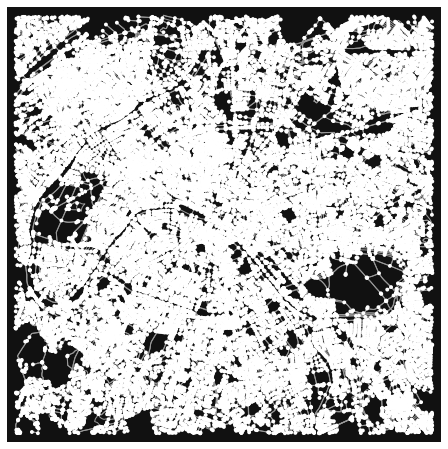

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd7b3b08990>)

In [ ]:
G = create_graph("Paris", 10000, "drive")
ox.plot_graph(G)

In [ ]:
trips_data_df['City'].value_counts()

1       306
3        98
92       34
267      13
537       8
52        7
14        7
34        5
40        3
38        2
51        1
265       1
15        1
12        1
8         1
5         1
1774      1
Name: City, dtype: int64

In [ ]:
trips_paris_df = trips_data_df[trips_data_df['City']==3]

lat_begin = trips_paris_df['Begin Trip Lat'].tolist()
lon_begin = trips_paris_df['Begin Trip Lng'].tolist()
lon_end = trips_paris_df['Dropoff Lng'].tolist()
lat_end = trips_paris_df['Dropoff Lat'].tolist()

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
# impute missing edge speeds and add travel times
G = ox.add_edge_speeds(G)
G = ox.add_edge_travel_times(G)

In [ ]:
routes_list = []

for lat_begin_,lon_begin_,lon_end_,lat_end_ in tqdm(zip(lat_begin,lon_begin,lon_end,lat_end)):
    start_node = ox.distance.nearest_nodes(G, lon_begin_,lat_begin_) 
    end_node = ox.distance.nearest_nodes(G, lon_end_,lat_end_)
    route = nx.shortest_path(G, start_node, end_node, weight='travel_time')
    routes_list.append(route)

0it [00:00, ?it/s]

In [ ]:
import matplotlib.pyplot as plt
import random

number_of_colors = len(routes_list)

color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
print(color)

['#D11B82', '#A820E6', '#8FC3AB', '#CE0BAB', '#983DE4', '#F2966F', '#2611F4', '#9C67DB', '#D4F84E', '#328D43', '#AAA725', '#79FF8A', '#B5F431', '#C794F5', '#DA426E', '#CB35E5', '#2900BF', '#3D9201', '#443F9C', '#89C4A4', '#ABC240', '#49EDF4', '#0687D1', '#F5789D', '#CB1ACC', '#2A3705', '#39A287', '#6F6BC6', '#A121B2', '#7A688A', '#9A96FB', '#239CDC', '#102BDA', '#5E1A94', '#07488F', '#7B7BAA', '#DFF2E9', '#6E643E', '#CC234B', '#B53E76', '#216FF4', '#197F19', '#E70050', '#910D96', '#847462', '#5E3B06', '#13F9CD', '#E554B0', '#B8265D', '#CBDA27', '#02F102', '#648A0D', '#C74998', '#AA8742', '#7BFB14', '#BF2CCC', '#9A28DF', '#AB16A9', '#858598', '#2713CA', '#AF12F0', '#BA0B7E', '#5FAB1E', '#85ABB9', '#89F000', '#D6FB51', '#3016F2', '#DF6F96', '#83B7D9', '#786555', '#63FD64', '#2FC8BF', '#E67609', '#00AF41', '#8A869C', '#72DCA9', '#0438D2', '#151317', '#FE7443', '#6FD56F', '#72B2C7', '#A72676', '#4DE283', '#C19C31', '#4E6EFA', '#65B313', '#2640C1', '#9BA1F8', '#64409C', '#354C6D', '#98F185'

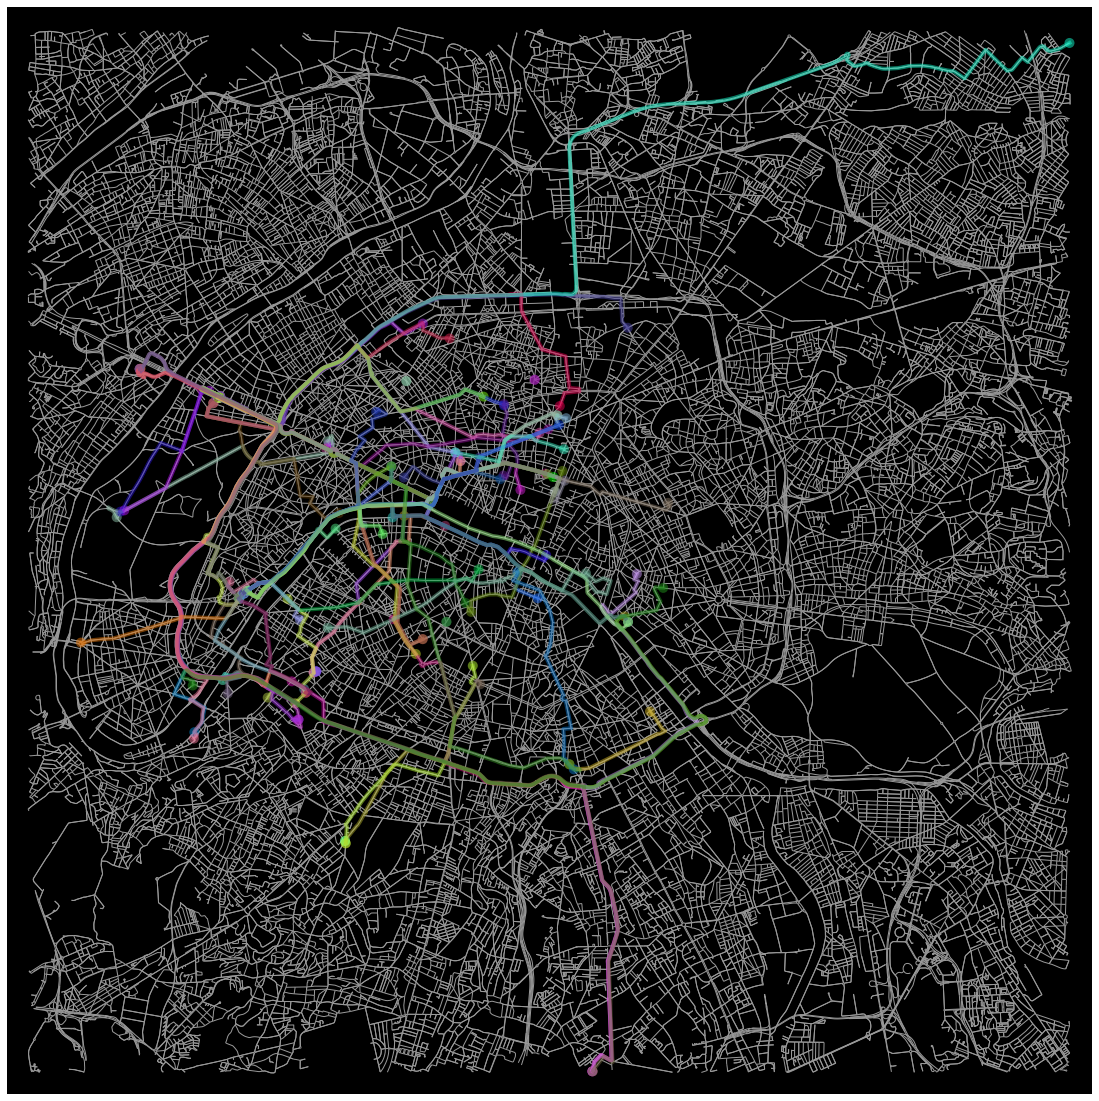

(<Figure size 1440x1440 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd7ca95ee90>)

In [ ]:
ox.plot_graph_routes(G, routes_list,route_colors=color, route_linewidth=6, node_size=0, bgcolor='k',figsize=(20, 20))

# Map route San Francisco


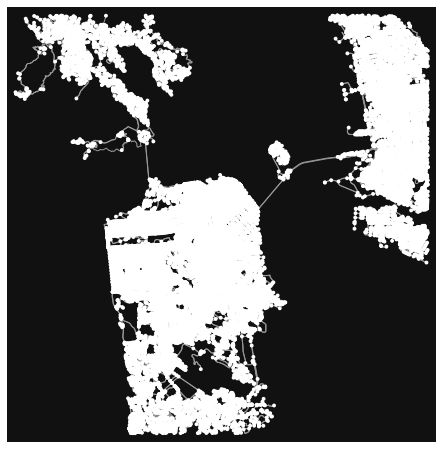

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd7b04c80d0>)

In [ ]:
G = create_graph("San Francisco", 15000, "drive")
ox.plot_graph(G)

In [ ]:
trips_sf_df = trips_data_df[trips_data_df['City']==1]

lat_begin = trips_sf_df['Begin Trip Lat'].tolist()
lon_begin = trips_sf_df['Begin Trip Lng'].tolist()
lon_end = trips_sf_df['Dropoff Lng'].tolist()
lat_end = trips_sf_df['Dropoff Lat'].tolist()

In [ ]:
# impute missing edge speeds and add travel times
G = ox.add_edge_speeds(G)
G = ox.add_edge_travel_times(G)

In [ ]:
routes_list = []

for lat_begin_,lon_begin_,lon_end_,lat_end_ in tqdm(zip(lat_begin,lon_begin,lon_end,lat_end)):
    start_node = ox.distance.nearest_nodes(G, lon_begin_,lat_begin_) 
    end_node = ox.distance.nearest_nodes(G, lon_end_,lat_end_)
    try:
        route = nx.shortest_path(G, start_node, end_node, weight='travel_time')
    except:
        print(f'no path {(lat_begin_,lon_begin_),(lat_end_,lon_end_)}')
        continue
    routes_list.append(route)

0it [00:00, ?it/s]

In [ ]:
import matplotlib.pyplot as plt
import random

number_of_colors = len(routes_list)

color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
print(color)

['#0185D7', '#4ACA4E', '#F5DE62', '#DADE9F', '#35E335', '#A903B8', '#823A81', '#789DA7', '#DDD0A8', '#4B1F97', '#E57E1B', '#A5996E', '#994890', '#29BAEB', '#4497C8', '#B6675D', '#65D5AC', '#C3F7AF', '#61A1A5', '#A9114B', '#6F4587', '#3E4179', '#48123C', '#19DF88', '#C9A714', '#DE384F', '#0FEF78', '#3E087A', '#536BBA', '#EF9AB5', '#E24AAC', '#E14B41', '#C46AFD', '#FBD594', '#6F8A12', '#C1C564', '#F3E154', '#0A0965', '#C8BC43', '#61D218', '#987998', '#2CA52B', '#9880F1', '#29B59C', '#918B16', '#4D5BD0', '#151814', '#DC4D3D', '#675C23', '#8CA0EE', '#026439', '#67189D', '#48D046', '#CDB456', '#8A0488', '#5DBB05', '#2EB731', '#F91FFD', '#6608F1', '#FBDEC7', '#85431F', '#565889', '#C0B055', '#C9D09E', '#6A7A4A', '#C68D42', '#9FC6FF', '#AC432B', '#987E92', '#58AA2A', '#FB4C36', '#A0E329', '#C43C56', '#2489DF', '#65D6CF', '#63D3F8', '#5EB69D', '#99159A', '#898BC1', '#E72718', '#15D518', '#25491C', '#7436FC', '#6AC463', '#8C4E60', '#204585', '#EAEB02', '#EFB72D', '#8E41F7', '#1E85BF', '#3AA1DC'

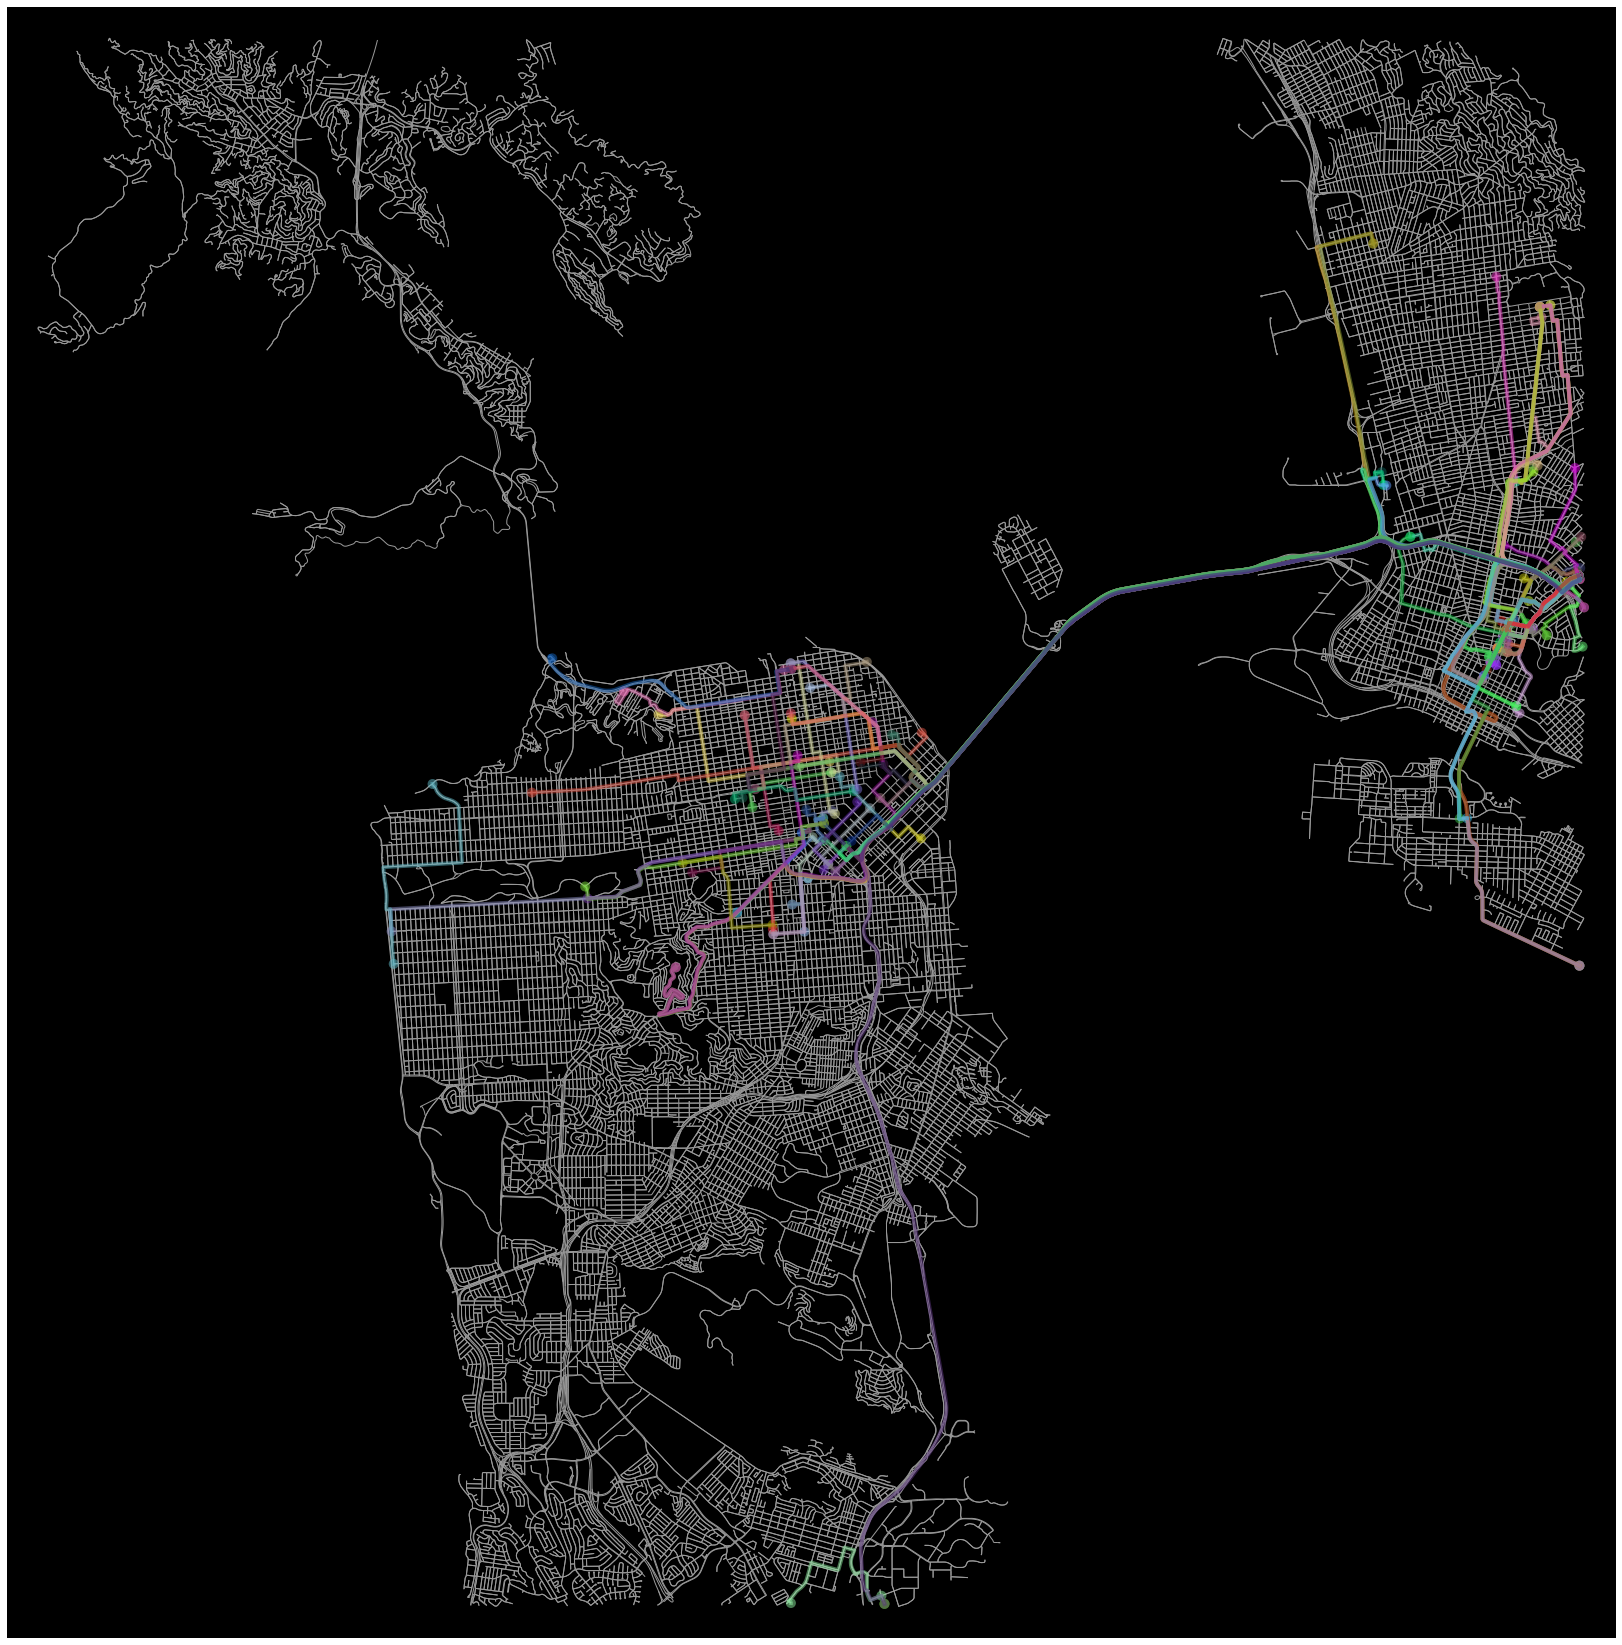

(<Figure size 2160x2160 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd7a66870d0>)

In [ ]:
ox.plot_graph_routes(G, routes_list,route_colors=color, route_linewidth=1, node_size=0, bgcolor='k',figsize=(30, 30),)